# Import data

In [144]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [145]:
#Load data from csv and store it in a dataframe
data = pd.read_csv("haberman.csv") #We can change this database

In [146]:
# We show the first individuals
data.head() # Return the first n rows

,Age,Year_of_op,Nbr_of_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


- Age = Age of patient at time of operation (numerical)
- Year_of_op = Patient's year of operation (year - 1900, numerical)
- Nbr_of_nodes = Number of positive axillary nodes detected (numerical)
- Surv_status = Survival status (class attribute); 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

# Data set description

In [147]:
print(data.shape)

(306, 4)


In [148]:
data.dtypes

Age             int64
Year_of_op      int64
Nbr_of_nodes    int64
Surv_status     int64
dtype: object

All the values of the dataset are integers.

In [149]:
data.columns

Index(['Age', 'Year_of_op', 'Nbr_of_nodes', 'Surv_status'], dtype='object')

# Statistics

In [150]:
data.describe()

,Age,Year_of_op,Nbr_of_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [151]:
print(data.nunique())

Age             49
Year_of_op      12
Nbr_of_nodes    31
Surv_status      2
dtype: int64


In [152]:
data["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

Because there is different amount of values one and two in survival status column, we have to construt the training data the way that there is same amount of values one and two in training dataset. Because in other case our model will classify value one more often than value two.

# Analyse

### Histograms

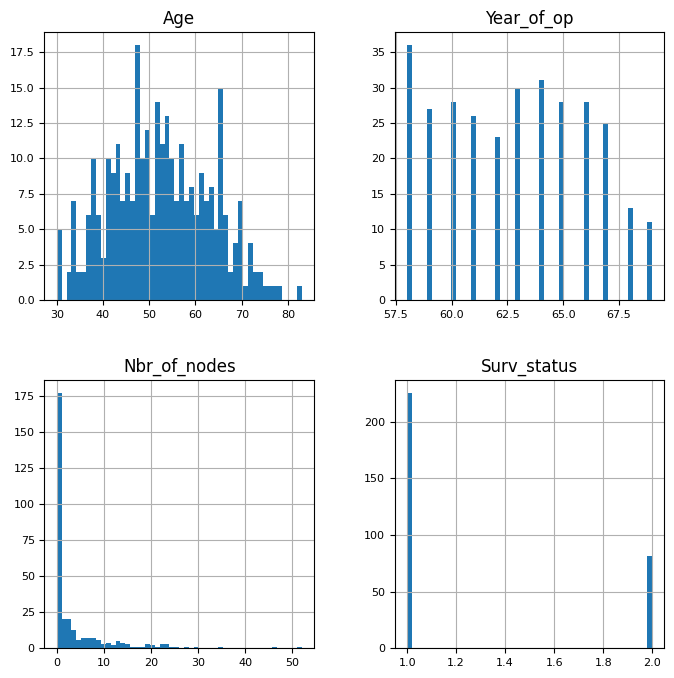

In [153]:
data.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8); 

From the figures above we can see that:
- Age variable is more or less normally distributed with mean 52 years and standard deviation 10 years. 
- Year of operation is more uniformly distributed variable whom range is from 58 to 69 years. 
- From the distribution of Number of nodes variable we can see that in most of cases number of positive axillary nodes detected has been lower than 5.
- From the distribution of Survival status variable we can see that majority of patients have survived 5 or more years after surgery.

# Boxplots

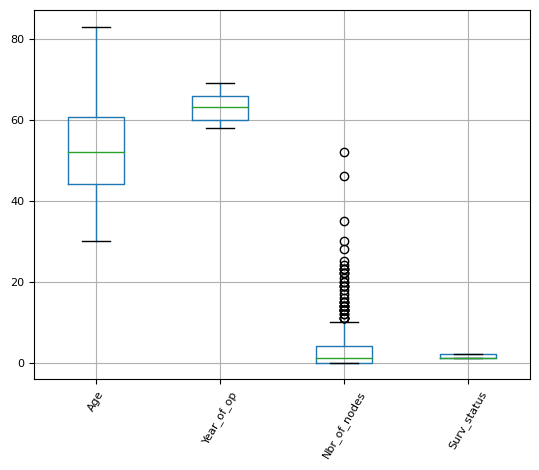

In [154]:
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

From this figure we can search the outliers of the data. The only variable where we can notice outliers seems to be Number of nodes. When investigating more precisely those outliers we can see that some of them has value over 30 and even over 40. Because in total human has 20-30 axillary nodes it is only possible to have max. 20-30 cancer cell positive axillary nodes. Because of that all the outliers with a value over 30 should be wrong values.

# Removing Outliers

Searching all the observations with a value over 30 in the Number of nodes column:

In [155]:
a = data[data["Nbr_of_nodes"] > 30]
print(a)

     Age  Year_of_op  Nbr_of_nodes  Surv_status
62    43          58            52            2
174   54          67            46            1
215   59          62            35            2


As we mentioned above we have some wrong values in Number of Nodes column. Because there is only three observation which has value over 30 in that column the easiest way is just to remove them. In this case removing those three observation is okay but if there would be more observations with wrong value the removing method wouldn't be the best one because then we would miss too much data.

In [156]:
# removing those three observations:
data = data.drop([62, 174, 215])

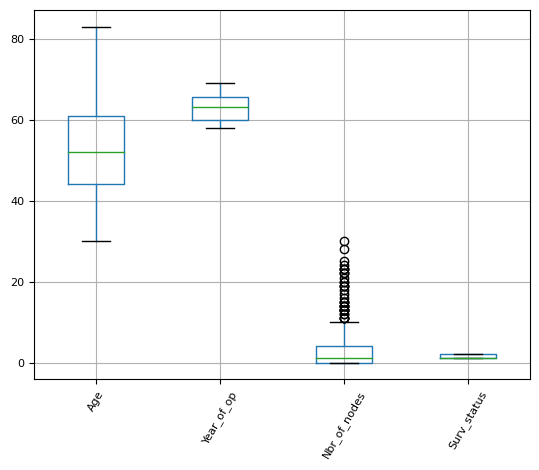

In [157]:
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

Even though after removing those three observations we still have some outliers in the Number of node column. However we are not going to remove or modify those observations because first of all there is lot of outliers and second of all the outliers are pretty close to each others. From the figure we can see them to constructing a line.

# Scatter plots

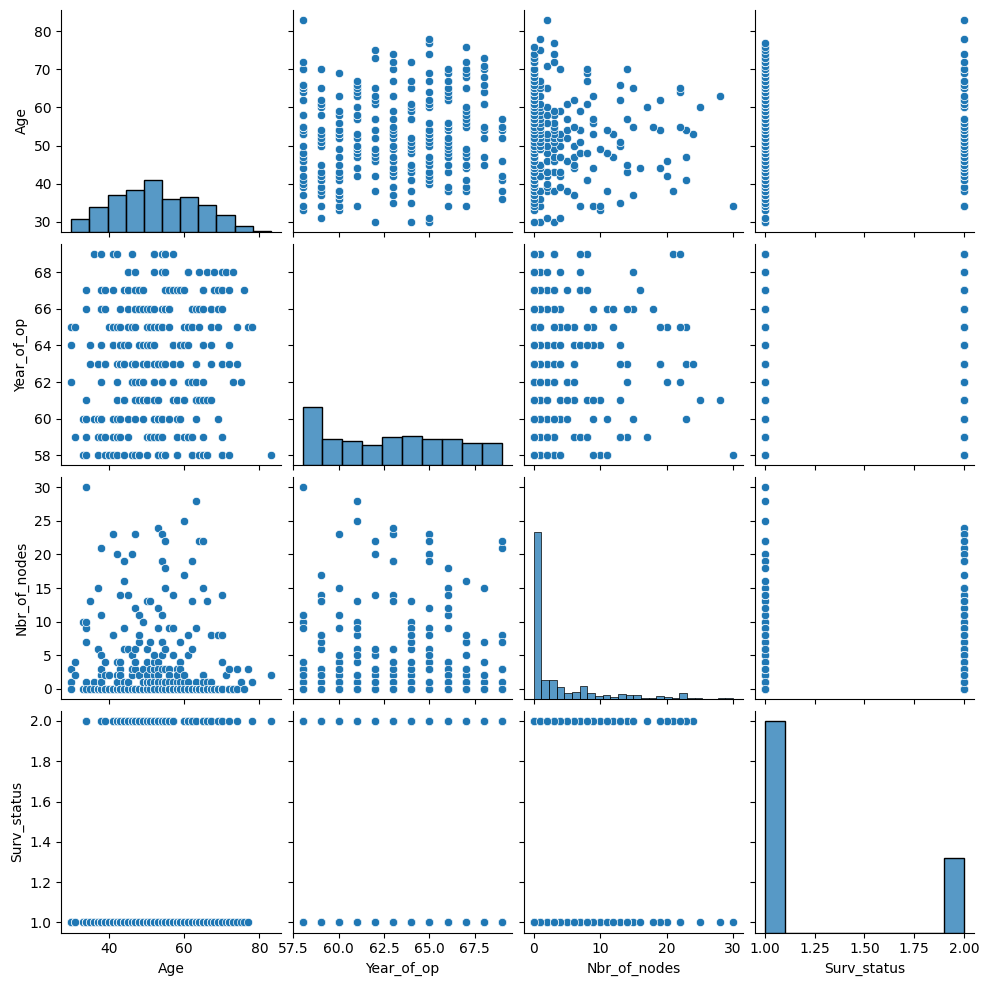

In [158]:
sns.pairplot(data)

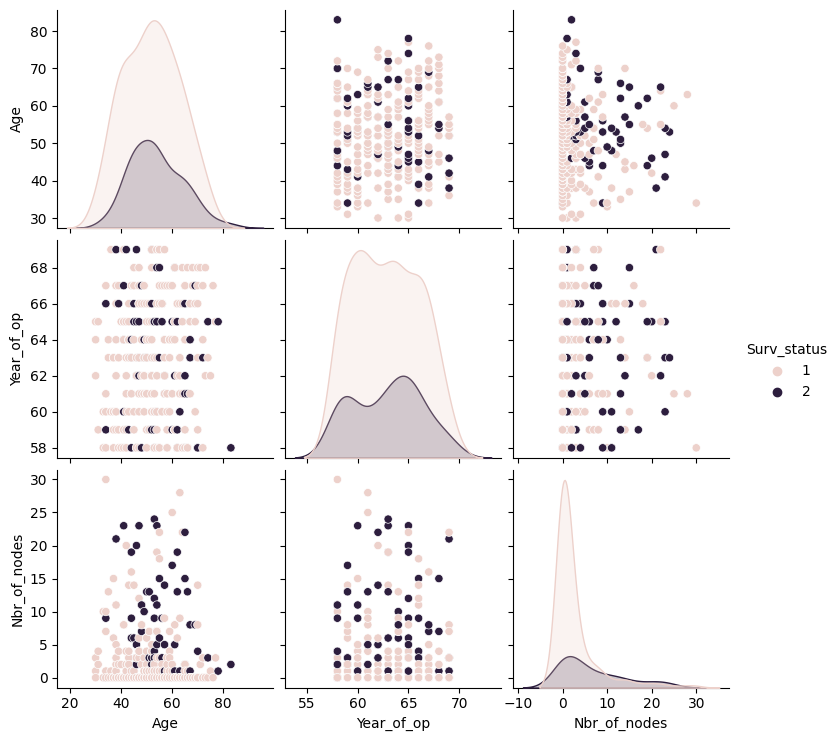

In [159]:
sns.pairplot(data, hue = 'Surv_status')

From these two scatter plots we can study the correlation between variables (or columns) of the data. When analysing those figures we can realise that it is really hard to find any kind of correlation between any of the variables. That is a good thing because highly correlated variables causes bias in a model. If we would have strong correlation between variables we should remove some of them.

# Grouping

In [160]:
data.groupby(['Surv_status', 'Age']).mean() 

Year_of_op  Nbr_of_nodes
Surv_status Age                          
1           30    63.666667      1.333333
            31    62.000000      3.000000
            33    59.000000      5.000000
            34    61.200000      9.600000
            35    63.500000      6.500000
...                     ...           ...
2           70    58.000000      2.000000
            72    63.000000      0.000000
            74    65.000000      3.000000
            78    65.000000      1.000000
            83    58.000000      2.000000

[80 rows x 2 columns]

In [161]:
data.groupby(["Surv_status"]).mean()

,Age,Year_of_op,Nbr_of_nodes
Surv_status,,,
1,52.008929,62.843750,2.598214
2,53.746835,62.898734,6.544304


It seems that the average age and year of operation does not differ almost at all in different survival status groups but the average number of nodes differs quite a much. This result indicates that patient's age and the year of operation wouldn't have as much influence to the survial status than number of nodes detected.

# Dealing with missing values

In [162]:
data.isnull().sum()

Age             0
Year_of_op      0
Nbr_of_nodes    0
Surv_status     0
dtype: int64

In [163]:
(data == 0).sum(axis=0)

Age               0
Year_of_op        0
Nbr_of_nodes    136
Surv_status       0
dtype: int64

No missing values in our dataset

# Dividing the data into training and testing data

Before training the model we have to divide the dataset into training dataset and testing dataset. We use the training dataset to train the model and testing dataset to test the performance of the model.

Before splitting the data into training and testing datasets we have to divide the data into input and output variables. Because we try to classify with our model whether patient's survival status is more than five years or less than five years using the data of the patient's age, number of positive cancer nodes and the year of cancer operation, our input variables are the Age, Year_of_op and Nbr_of_nodes and the output variable is Surv_status variable.

In [164]:
# Input and output data:
X = data.loc[:, :"Nbr_of_nodes"] # input vriables
Y = data.loc[:,"Surv_status"] # output variables
print("Input data:\n", X.head())
print("\nOutput data:\n", Y.head())

Input data:
    Age  Year_of_op  Nbr_of_nodes
0   30          64             1
1   30          62             3
2   30          65             0
3   31          59             2
4   31          65             4

Output data:
 0    1
1    1
2    1
3    1
4    1
Name: Surv_status, dtype: int64


In [165]:
# Shuffling input and output data:
from sklearn.utils import shuffle

Xs, Ys = shuffle(X, Y, random_state = 19)
print("Shuffled input data:\n", Xs.head())
print("\nShuffled output data:\n", Ys.head())

Shuffled input data:
      Age  Year_of_op  Nbr_of_nodes
138   51          64             7
27    38          60             0
8     34          66             9
191   56          66             3
139   51          59             1

Shuffled output data:
 138    1
27     1
8      2
191    2
139    1
Name: Surv_status, dtype: int64


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year_of_op'}>],
       [<AxesSubplot:title={'center':'Nbr_of_nodes'}>, <AxesSubplot:>]],
      dtype=object)

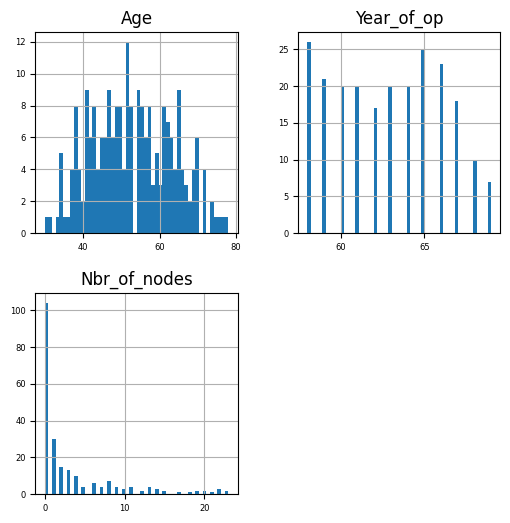

In [166]:
# Splitting the dataset into training and testing data:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, random_state = 20) # using the defalut value for the observation
# percentage of the training subset which is 75% of the original dataset

# checking the distributions of the training and testing data:
X_train.hist(figsize=(6, 6), bins=50, xlabelsize=6, ylabelsize=6) # input data of the training dataset

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year_of_op'}>],
       [<AxesSubplot:title={'center':'Nbr_of_nodes'}>, <AxesSubplot:>]],
      dtype=object)

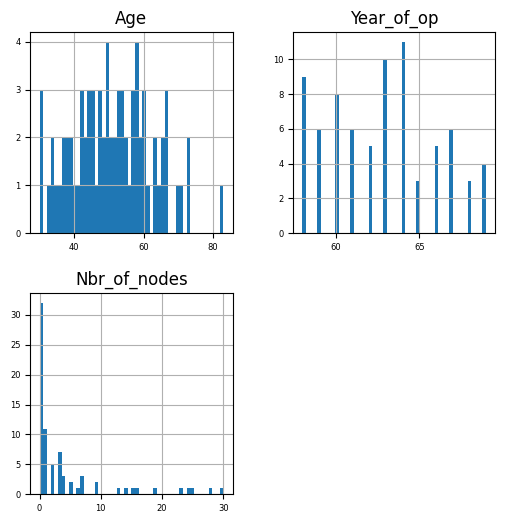

In [167]:
X_test.hist(figsize=(6, 6), bins=50, xlabelsize=6, ylabelsize=6) # input data of the testing dataset

From the figures above we can see that the distributions of the input variables in training and testing datasets looks the same, which is good thing, because then we know that the splitting of the dataset splitted also the information in the original dataset equally.

<AxesSubplot:>

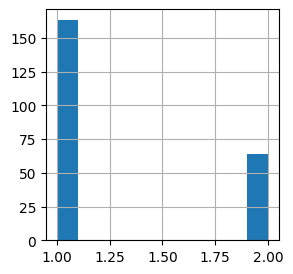

In [168]:
Y_train.hist(figsize=(3,3)) # output data of the training dataset

<AxesSubplot:>

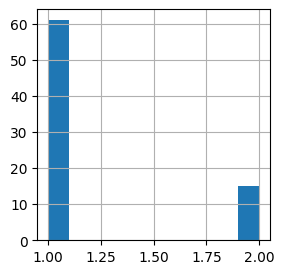

In [169]:
Y_test.hist(figsize=(3,3)) # output data of the testing dataset

Also the distribution of the output variable in the training and testing datasets looks the same.

# Dealing with imbalance classes

From the figures above we can see that in both output datasets (Y_train and Y_test) there is different amount of variables with the value one and two. If we do nothing to that we will have problems, because if we train the model using inbalanced output data the model will give more likely results like the dominant output in the training data. Because of that we have to balance our training dataset. 

To balance our training dataset we use SMOTE method.

In [170]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(X_train, Y_train)
print(y_train_smote.value_counts())

2    163
1    163
Name: Surv_status, dtype: int64


Above we can see that after balancing the training data we have equal amount of observations with the value one and two in the output column of our training data.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year_of_op'}>],
       [<AxesSubplot:title={'center':'Nbr_of_nodes'}>, <AxesSubplot:>]],
      dtype=object)

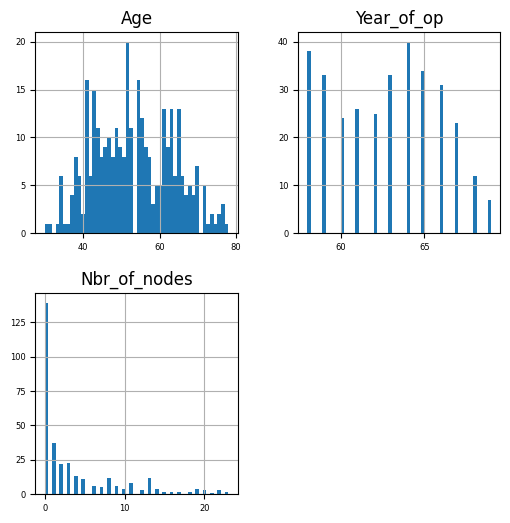

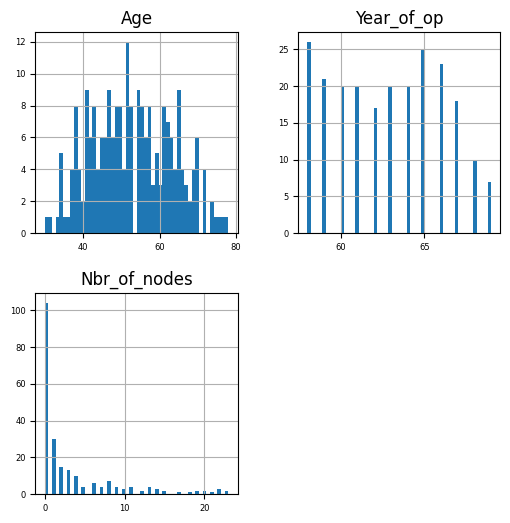

In [171]:
# checking if the distributions of the input variables in the training dataset remained the same as before:
x_train_smote.hist(figsize=(6,6), bins=50, xlabelsize=6, ylabelsize=6) # dataset after SMOTE
X_train.hist(figsize=(6, 6), bins=50, xlabelsize=6, ylabelsize=6) # dataset befoe SMOTE

This checking of the distribution isn't mandatory because of the way SMOTE method balances the classes, but at least now we can be sure.

# Normalizing the data

Because after training the model we want to compare the input variables' regression coefficients, we should normalize the data. If we don't normalize the data, the coefficients are not comparable because the coefficients of the variables depends then also of the size ranges of the variables' values.

First we normalize the input variables of the training data and after that we normalize the input variables of the testing data using the same mean and standard deviation as when we were normalizing the training data.

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_smote)
X_train_bal_norm = scaler.transform(x_train_smote)
X_test_norm = scaler.transform(X_test)

# Constructing the ML models

Now we are ready to start implement the ML model. As we told above our mission is to classificate with our model if the patient will survive more or less than five years by using patient's age, number of positive cancer nodes and year of cancer operation as an input data. Because our output variable is discrete and has only two classes we can use the logistic regression model.

Nevertheless before starting to train the model we have to recode our output variable to have only values 0 or 1 because the logistic regression model can only give values 0 or 1 as an output.

In [173]:
# recoding the output variables
Y_train_s = y_train_smote.replace([1, 2], [0, 1])
Y_test = Y_test.replace([1, 2], [0, 1])


Next we will construct four logistic regression models; normal logistic regression model, logistic ridge regression, logistic lasso regression and logistic elastic net regression. After training those models we evaluate them using the testing dataset and after all we will make a conclusion of the best model.

* Normal logistic regression:

In [174]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor_trnd = regressor.fit(X_train_bal_norm, Y_train_s)

print("Intercept of the model:", regressor_trnd.intercept_[0]) # intercept
coefs = regressor_trnd.coef_[0]
print("Coef. for age:", coefs[0])
print("Coef. for year of operation:", coefs[1])
print("Coef. for number of nodes:", coefs[2])

Intercept of the model: 0.03684165140503269
Coef. for age: 0.13401618067954524
Coef. for year of operation: -0.052556743969226376
Coef. for number of nodes: 0.6954594918078242


According to the coefficients of the model we see that the number of node variable has the biggest impact to the survival status and that age and year of operation have little impact on it.

In [185]:
# prediction using the test set
y_pred = regressor_trnd.predict(X_test_norm)
y_pred_prob = regressor_trnd.predict_proba(X_test_norm)

# metrics:
from sklearn.metrics import confusion_matrix

cm_n = confusion_matrix(Y_test, y_pred) 
print(cm)

tn_n, fp_n, fn_n, tp_n = confusion_matrix(Y_test, y_pred).ravel()
print("tn:", tn_n, ",", "fp:", fp_n, ",", "fn:", fn_n, ",", "tp:", tp_n)

# accuracy
from sklearn.metrics import accuracy_score
accuracy_n = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_n)

from sklearn.metrics import classification_report
names = ["surv. status >= 5 years", "surv. status < 5 years"]
print(classification_report(Y_test, y_pred, target_names=names))

# sensibility
from sklearn.metrics import recall_score
sensibility_n = recall_score(Y_test, y_pred)
print("Sensibility:", sensibility_n)

[[55 21]
 [ 0  0]]
tn: 47 , fp: 14 , fn: 8 , tp: 7
Accuracy: 0.7105263157894737
                         precision    recall  f1-score   support

surv. status >= 5 years       0.85      0.77      0.81        61
 surv. status < 5 years       0.33      0.47      0.39        15

               accuracy                           0.71        76
              macro avg       0.59      0.62      0.60        76
           weighted avg       0.75      0.71      0.73        76

Sensibility: 0.4666666666666667


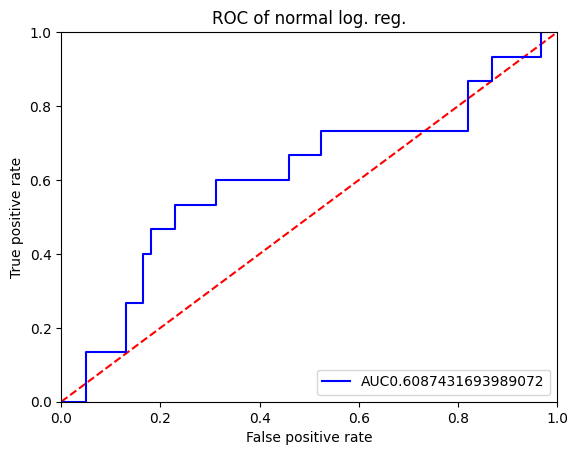

In [198]:
# computing the ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr_n, tpr_n, treshold_n = roc_curve(Y_test, y_pred_prob[:,1])
auc_n = auc(fpr_n, tpr_n)

# plotting
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_n, tpr_n, "b", label="AUC"+str(auc_n))
plt.legend(loc='lower right')
plt.xlim([0, 1]), plt.ylim([0, 1])
plt.title("ROC of normal log. reg.")
plt.xlabel("False positive rate"), plt.ylabel("True positive rate")
plt.show()

* logistic ridge regression: